# pandasを用いたデータ処理

Microsoft社のExcelではデータを表形式で取り扱っている。
Pythonで表形式のデータの処理を行うために**データフレーム**がpandasに実装されている。
CSVファイルやテキストファイル、Excelファイルなどを読み込むことができる。

## 気象庁の銚子における気温データ

気象庁の銚子地方気象台における日平均気温・日最低気温・日最高気温のデータを、
pandasデータフレームに読み込んで解析を行う。

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

pandasの``read_csv()``を用いて、CSV形式のファイルを読み込み、データフレームの先頭の５行を``head()``を用いて表示する。

In [3]:
df = pd.read_csv("./Data/Choshi.csv", na_values=[-999.9])
df.head()

,Date,Tave,Tmin,Tmax
0,1951/1/1,2.2,-1.0,8.8
1,1951/1/2,1.4,-1.7,6.6
2,1951/1/3,5.0,-0.6,9.7
3,1951/1/4,6.5,3.5,9.8
4,1951/1/5,2.4,-1.4,9.6


データフレームには列が4個あり、
それぞれ"Date（観測日）"、"Tave（日平均気温）"、"Tmin（日最低気温）"、
"Tmax（日最高気温）"である。
また、各行の左端に数字が表示されているが、それはデータフレームの"index"である。

まず文字列の"date"をpythonのdatetime64型に変換する。
datetime64型に変換することにより、日付や時刻に関する情報をより直感的に取り扱うことができるようになる。

In [4]:
df['time'] = pd.to_datetime(df['Date'], format="%Y/%m/%d")
df.head()

,Date,Tave,Tmin,Tmax,time
0,1951/1/1,2.2,-1.0,8.8,1951-01-01
1,1951/1/2,1.4,-1.7,6.6,1951-01-02
2,1951/1/3,5.0,-0.6,9.7,1951-01-03
3,1951/1/4,6.5,3.5,9.8,1951-01-04
4,1951/1/5,2.4,-1.4,9.6,1951-01-05


データフレームのindexを取り除き、datetime64型の"time"を``set_index()``を用いて
データフレームのDatetimeIndexとして設定する。

その後"date"列を削除する。

In [5]:
df = df.set_index("time")
df = df.drop("Date", axis=1)
df.head()

,Tave,Tmin,Tmax
time,,,
1951-01-01,2.2,-1.0,8.8
1951-01-02,1.4,-1.7,6.6
1951-01-03,5.0,-0.6,9.7
1951-01-04,6.5,3.5,9.8
1951-01-05,2.4,-1.4,9.6


読み込んだデータフレームの気温データに欠損値がないか``isna()``を用いて検索する。

In [6]:
df.loc[df['Tave'].isna()]

,Tave,Tmin,Tmax
time,,,


日平均気温の時系列図を作成する。

<Axes: xlabel='time'>

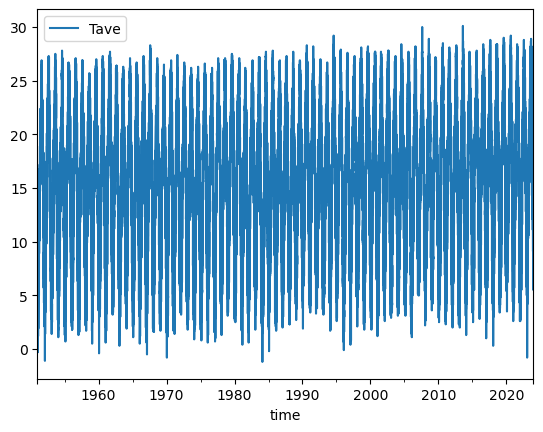

In [7]:
df.plot(y='Tave')

日平均気温の月平均値の長期平均値を作成する。
pandasの``groupby()``を用いることにより、月ごとの統計値を作成できる。
なお、データフレームのindexをDatetimeIndexにしてあることにより
"date.month"または"df.index.month"として「月の情報」を得ることができる。

In [8]:
date = df.index
tempM = df['Tave'].groupby(date.month).mean()
tempM

time
1      6.198100
2      6.599855
3      9.310561
4     13.532237
5     17.163102
6     19.821507
7     23.104331
8     25.208308
9     23.058858
10    18.661997
11    14.032557
12     8.992223
Name: Tave, dtype: float64

次の二つのセルのように記述しても同じ結果が得られる。

In [9]:
tempM2 = df['Tave'].groupby(df.index.month).mean()
tempM2

time
1      6.198100
2      6.599855
3      9.310561
4     13.532237
5     17.163102
6     19.821507
7     23.104331
8     25.208308
9     23.058858
10    18.661997
11    14.032557
12     8.992223
Name: Tave, dtype: float64

In [10]:
tempM3 = df.Tave.groupby(df.index.month).mean()
tempM3

time
1      6.198100
2      6.599855
3      9.310561
4     13.532237
5     17.163102
6     19.821507
7     23.104331
8     25.208308
9     23.058858
10    18.661997
11    14.032557
12     8.992223
Name: Tave, dtype: float64

日平均気温の長期平均の季節変化図を作成する。

<>:5: SyntaxWarning: invalid escape sequence '\c'
<>:5: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_66834/1900822948.py:5: SyntaxWarning: invalid escape sequence '\c'
  ax.set_ylabel("Temperature ($^\circ$C)")


Text(0, 0.5, 'Temperature ($^\\circ$C)')

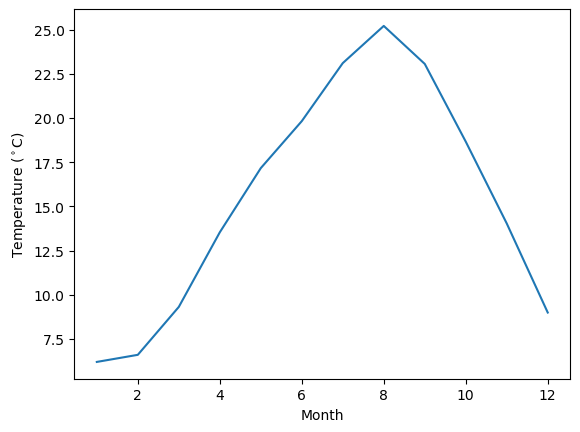

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111)
tempM3.plot(ax = ax)
ax.set_xlabel("Month")
ax.set_ylabel("Temperature ($^\circ$C)")

各年の日平均気温の年平均値を求めて、時系列図を作成する。

In [12]:
tempY = df['Tave'].groupby(df.index.year).mean()

<>:6: SyntaxWarning: invalid escape sequence '\c'
<>:6: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_66834/125275173.py:6: SyntaxWarning: invalid escape sequence '\c'
  ax.set_ylabel("Temperature ($^\circ$C)")


Text(0, 0.5, 'Temperature ($^\\circ$C)')

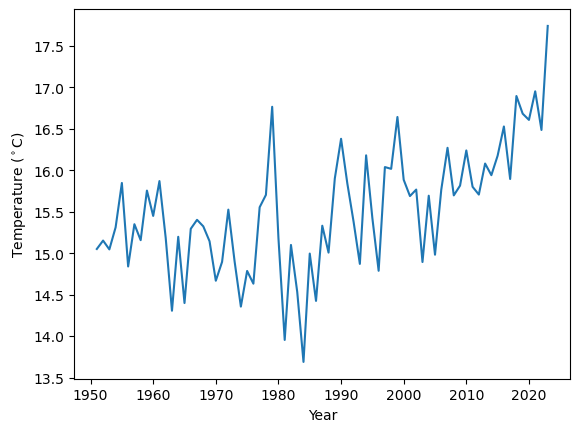

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)
tempY.plot(ax = ax)
ax.set_xlabel("Year")
#ax.set_ylabel(u"Temperature (\u00B0C)")
ax.set_ylabel("Temperature ($^\circ$C)")

各年の各月の月平均値を作成する。

In [14]:
df2 = df['Tave'].groupby([df.index.year, df.index.month]).mean()
df2.head()

time  time
1951  1        4.893548
      2        6.046429
      3        9.845161
      4       13.173333
      5       17.148387
Name: Tave, dtype: float64

In [15]:
df2.index

MultiIndex([(1951,  1),
            (1951,  2),
            (1951,  3),
            (1951,  4),
            (1951,  5),
            (1951,  6),
            (1951,  7),
            (1951,  8),
            (1951,  9),
            (1951, 10),
            ...
            (2023,  3),
            (2023,  4),
            (2023,  5),
            (2023,  6),
            (2023,  7),
            (2023,  8),
            (2023,  9),
            (2023, 10),
            (2023, 11),
            (2023, 12)],
           names=['time', 'time'], length=876)

データフレームは年と月という二つのインデックスを持っている。これらのインデックスからDatetimeIndexを作成し、データフレームのインデックスにする。

In [16]:
df2.index = pd.to_datetime([f'{a}-{b}-01' for a, b in df2.index])
df2.head()

1951-01-01     4.893548
1951-02-01     6.046429
1951-03-01     9.845161
1951-04-01    13.173333
1951-05-01    17.148387
Name: Tave, dtype: float64

<Axes: >

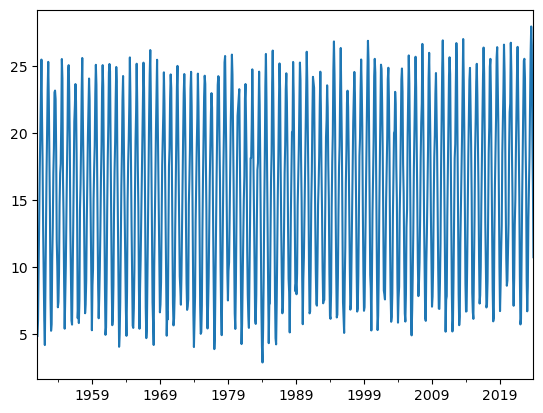

In [17]:
df2.plot()

別の方法（``resample()``）も用いても月平均値は求めることができる。

/tmp/ipykernel_66834/1547262899.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df['Tave'].resample('M').mean().plot()


<Axes: xlabel='time'>

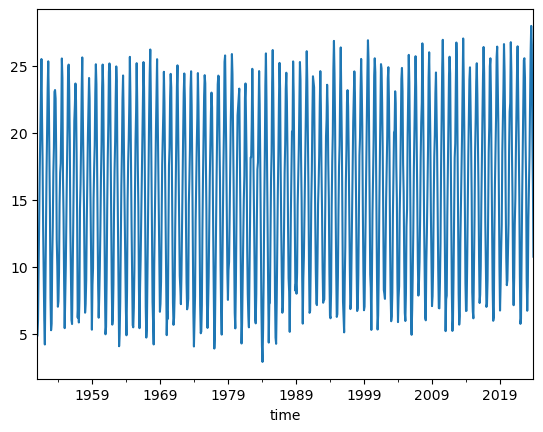

In [18]:
df['Tave'].resample('M').mean().plot()
#df['Tave'].resample('M').mean().plot(marker="o")

各年の有効なデータ数、平均値などを``describe()``を用いて算出する。

In [19]:
df['Tave'].groupby(df.index.year).describe()

,count,mean,std,min,25%,50%,75%,max
time,,,,,,,,
1951,365.0,15.050959,6.783033,-0.3,9.900,15.60,20.4,26.9
1952,366.0,15.152459,7.218244,-1.1,8.025,16.20,21.3,27.3
1953,365.0,15.046027,6.612793,1.4,9.700,15.80,20.5,27.5
1954,365.0,15.311781,6.501530,1.1,10.100,15.90,19.5,27.8
1955,365.0,15.847397,6.851211,0.7,10.300,16.60,21.7,26.7
...,...,...,...,...,...,...,...,...
2019,365.0,16.683288,6.747345,3.4,10.400,17.30,22.2,29.0
2020,366.0,16.608197,6.527173,3.4,11.325,16.85,21.5,29.2
2021,365.0,16.953151,6.585509,2.6,11.900,17.20,22.3,28.4


2010年から2015年のデータを抽出する。

In [20]:
df3 = df['2010-01-01':'2015-12-31']
df3.head()

,Tave,Tmin,Tmax
time,,,
2010-01-01,4.7,0.9,8.7
2010-01-02,6.6,3.5,10.7
2010-01-03,6.1,2.7,9.6
2010-01-04,5.9,2.1,8.5
2010-01-05,10.2,5.0,14.1


日平均気温・日最低気温・日最高気温の月平均値を求める。

In [21]:
df4 = df3.groupby([df3.index.year, df3.index.month]).mean()
df4.head()

Tave       Tmin       Tmax
time time                                 
2010 1      6.932258   3.054839  10.396774
     2      6.907143   3.921429   9.982143
     3      8.822581   5.741935  11.709677
     4     11.763333   8.793333  15.126667
     5     17.425806  14.709677  20.603226

<Axes: xlabel='time,time'>

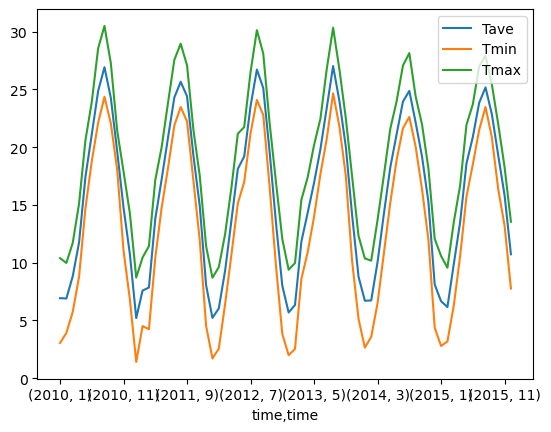

In [22]:
df4.plot()

次のようにすると日平均気温・日最高気温・日最低気温が別々のグラフとして描かれる。

array([<Axes: xlabel='time,time'>, <Axes: xlabel='time,time'>,
       <Axes: xlabel='time,time'>], dtype=object)

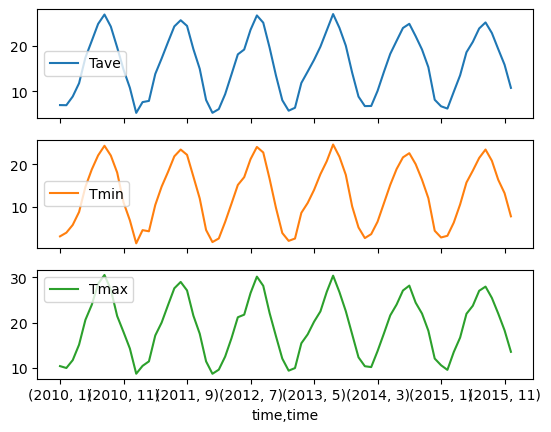

In [23]:
df4.plot(subplots=True)

2011年のデータを抽出する。

In [24]:
df5 = df['2010-01-01':'2010-12-31']

``rolling()``を用いて11日間移動平均値を求める。
なお``rolling()``のオプションとして``center=True``とすることで
当該日を中心とした移動平均の窓の設定となる（11日移動平均であると、前５日間と後５日間）。

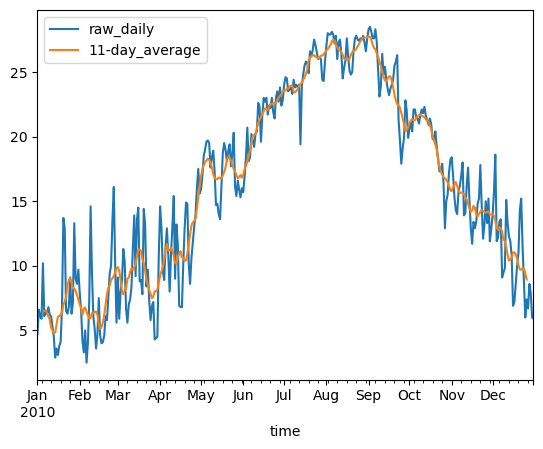

In [25]:
df5['Tave'].plot()
df5['Tave'].rolling(11, center=True).mean().plot()
plt.legend(["raw_daily","11-day_average"])

## 練習

東京の気温データを用いて、各年の日平均気温の平均値を求め、時系列を可視化せよ。